# Importation des packages nécessaires

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

# Base de données

Notre base de données provient de l'ADEME et concerne le parc de véhicules, au niveau régional, par motorisation, âge, statut de l'utilisateur, vignette Crit'Air et type de véhicule au 1er janvier de chaque année depuis 2011 et jusqu'en 2022. 

Nous avons 14260 observations pour 20 variables.

In [3]:
data=pd.read_csv("Donnees-sur-le-parc-de-vehicule-au-niveau-regional.2023-05.csv", sep=';',header=[1])
data.head()

,REGION_CODE,REGION_LIBELLE,CLASSE_VEHICULE,CATEGORIE_VEHICULE,CARBURANT,AGE,STATUT_UTILISATEUR,CRITAIR,PARC_2011,PARC_2012,PARC_2013,PARC_2014,PARC_2015,PARC_2016,PARC_2017,PARC_2018,PARC_2019,PARC_2020,PARC_2021,PARC_2022
0,84,Auvergne-Rhône-Alpes,tcp,Autobus,Diesel,0 an,Professionnel,Crit'Air 2,0,0,0,4,74,188,175,253,178,162,85,32
1,84,Auvergne-Rhône-Alpes,tcp,Autocar,Diesel,0 an,Professionnel,Crit'Air 2,0,0,0,9,436,644,644,693,556,709,383,331
2,84,Auvergne-Rhône-Alpes,tcp,Autobus,Diesel,0 an,Professionnel,Crit'Air 3,187,182,223,178,43,4,3,0,0,0,0,0
3,84,Auvergne-Rhône-Alpes,tcp,Autocar,Diesel,0 an,Professionnel,Crit'Air 3,487,552,500,713,194,20,2,2,0,0,0,0
4,84,Auvergne-Rhône-Alpes,tcp,Autobus,Diesel,0 an,Professionnel,Crit'Air 4,1,1,0,0,0,0,0,0,0,0,0,0


# Visualisation des différentes catégories de véhicules

In [4]:
variables = ['PARC_2011','PARC_2012','PARC_2013','PARC_2014','PARC_2015','PARC_2016','PARC_2017','PARC_2018','PARC_2019','PARC_2020','PARC_2021','PARC_2022']
data.groupby('CATEGORIE_VEHICULE')[variables].sum()

,PARC_2011,PARC_2012,PARC_2013,PARC_2014,PARC_2015,PARC_2016,PARC_2017,PARC_2018,PARC_2019,PARC_2020,PARC_2021,PARC_2022
CATEGORIE_VEHICULE,,,,,,,,,,,,
Autobus,19935,20379,20567,21261,21445,21995,21857,22208,23798,25039,26399,27927
Autocar,63538,64507,64562,65313,65539,65356,66658,67249,66972,67258,66519,66596
Autre VASP,111407,112299,115030,116821,119137,121772,125604,130150,132851,135047,141331,148602
Camion,317242,319386,314912,311576,308993,304994,305086,307067,306356,306208,304688,307385
Camionnette,4197919,4278148,4337506,4421633,4508317,4581776,4679694,4798184,4857367,4823739,4831151,4868001
Camping-car,299354,315358,328242,341066,354094,368545,383908,399781,415555,431637,449049,473771
Dérivé VP,831826,844830,850112,859212,869492,877070,891033,903609,900248,875600,835900,788506
Tracteur routier,198031,199745,195227,194017,192090,194354,198194,205362,213177,217796,216157,219795
VASP lourd,72433,75135,76914,78750,80353,81555,82656,83470,84440,85981,87013,89125


Nous pouvons voir que le nombre de véhicules par catégorie a tendance à augmenter au fil du temps.

In [5]:
categories=data.groupby('CATEGORIE_VEHICULE')[variables].sum()
categories=categories.mean(axis=1)

#Caluler la proportion de chaque categorie de véhicule:
proportion_vehicules = categories / categories.sum()
proportion_vehicules

CATEGORIE_VEHICULE
Autobus                 0.000519
Autocar                 0.001502
Autre VASP              0.002870
Camion                  0.007059
Camionnette             0.104892
Camping-car             0.008668
Dérivé VP               0.019630
Tracteur routier        0.004645
VASP lourd              0.001859
Véhicule particulier    0.848355
dtype: float64

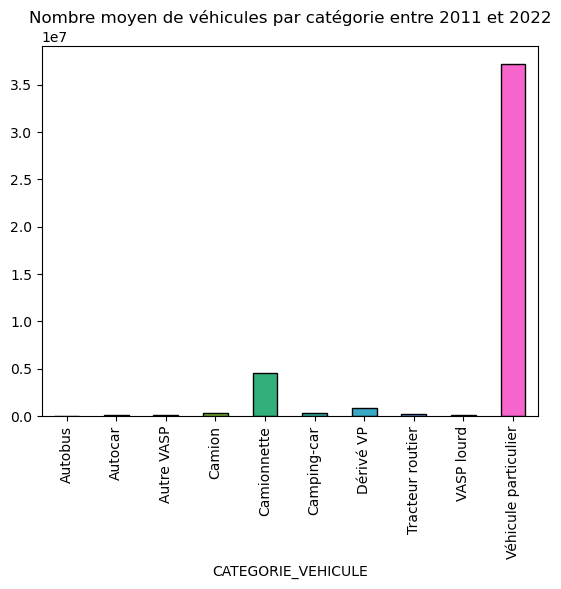

In [6]:
couleurs_palette = sns.color_palette("husl", n_colors=len(categories))
categories.plot(kind='bar', edgecolor='black', color=couleurs_palette)
plt.title("Nombre moyen de véhicules par catégorie entre 2011 et 2022")
plt.show()

Comme nous pouvons le voir, nous avons 10 catégories de véhicules différentes. Les véhicules particuliers sont très largement 
surreprésentés puisque plus de 84% des véhicules sont des véhicules particuliers.
Dans cet étude nous ne nous interresseront donc seulement aux véhicules particuliers.

In [7]:
data = data.loc[data["CATEGORIE_VEHICULE"] == "Véhicule particulier"] #Récupération des véhicules particuliers seulement
data.reset_index(drop=True, inplace=True)
data.head()

,REGION_CODE,REGION_LIBELLE,CLASSE_VEHICULE,CATEGORIE_VEHICULE,CARBURANT,AGE,STATUT_UTILISATEUR,CRITAIR,PARC_2011,PARC_2012,PARC_2013,PARC_2014,PARC_2015,PARC_2016,PARC_2017,PARC_2018,PARC_2019,PARC_2020,PARC_2021,PARC_2022
0,84,Auvergne-Rhône-Alpes,vp,Véhicule particulier,Diesel,0 an,Professionnel,Crit'Air 1,0,2,1,3,0,5,0,0,0,0,0,0
1,84,Auvergne-Rhône-Alpes,vp,Véhicule particulier,Diesel,0 an,Professionnel,Crit'Air 2,22840,60245,58627,56823,55903,55948,59274,62531,56444,53142,37552,29362
2,84,Auvergne-Rhône-Alpes,vp,Véhicule particulier,Diesel,0 an,Professionnel,Crit'Air 3,32626,2456,54,1,1,1,1,0,0,0,0,0
3,84,Auvergne-Rhône-Alpes,vp,Véhicule particulier,Diesel,0 an,Professionnel,Crit'Air 4,7,1,0,0,1,0,0,0,0,0,0,0
4,84,Auvergne-Rhône-Alpes,vp,Véhicule particulier,Diesel,0 an,Professionnel,Crit'Air 5,0,1,0,0,0,0,0,0,0,0,0,0


# Évolution du nombre de véhicules particuliers chaque année

Nous allons tout d'abord chercher à comprendre comment évolue le nombre de véhicules particuliers par an sur le parc automobile, avant de passer à des études plus spécifiques en fonction des Crit'Air et du carburant.

In [8]:
def nb_vehicules(data):
    annees={'Années':[2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]}
    annees=pd.DataFrame(annees)
    nb={'Nombre_Vehicules':[]}
    n=[]
    for k in range (11,23):
        n.append(data[f'PARC_20{k}'].sum())
    nb['Nombre_Vehicules']=n
    nb=pd.DataFrame(nb)
    df=pd.concat([annees,nb],axis=1)
    return df

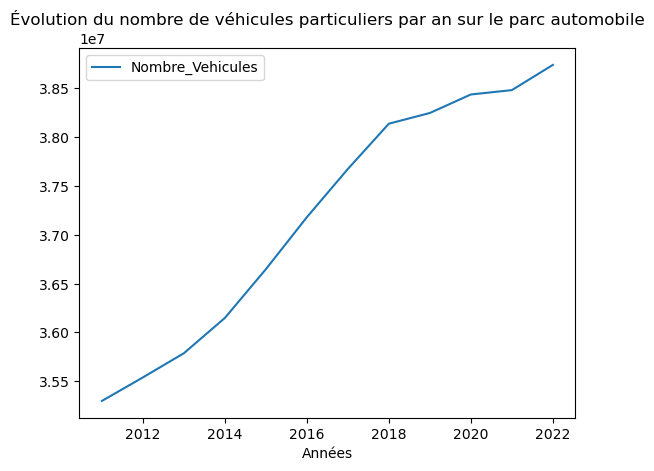

In [9]:
n=nb_vehicules(data)
n=n.set_index('Années')
n.plot()
plt.title("Évolution du nombre de véhicules particuliers par an sur le parc automobile")
plt.show()

Cette croissance semble à première vu linéaire, ce qui nous permet de faire une simple régression linéaire pour prédire le nombre de véhicules chaque année sur le parc.

In [28]:
df=nb_vehicules(data)
df['Taux de croissance'] = ((df['Nombre_Vehicules'] - df['Nombre_Vehicules'].shift(1)) / df['Nombre_Vehicules'].shift(1))*100
print(f"Le taux de croissance moyen est de : {df['Taux de croissance'].mean():.2F} % par an.")

Le taux de croissance moyen est de : 0.85 % par an.


## Évolution du nombre de véhicules par crit'air

Nous allons ici étudier l'évolution du nombre de véhicules en fonction de leur vignette Crit'air.

In [36]:
result_crit = data.groupby(['CRITAIR'])[['PARC_2011','PARC_2012','PARC_2013','PARC_2014','PARC_2015','PARC_2016','PARC_2017','PARC_2018','PARC_2019','PARC_2020','PARC_2021','PARC_2022']].sum().reset_index()
result_crit

,CRITAIR,PARC_2011,PARC_2012,PARC_2013,PARC_2014,PARC_2015,PARC_2016,PARC_2017,PARC_2018,PARC_2019,PARC_2020,PARC_2021,PARC_2022
0,Crit'Air 1,527854,1117200,1628418,2209327,2843000,3627493,4573613,5689663,7038271,8486922,9606394,10798122
1,Crit'Air 2,3789902,5316792,6759839,8048141,9248639,10321928,11295451,12142060,12842824,13548475,13972530,14155893
2,Crit'Air 3,13144926,12986403,12702081,12429698,12177620,11904009,11544080,11109790,10535664,9934637,9280651,8651975
3,Crit'Air 4,5846557,5728186,5612887,5476668,5331910,5141116,4897301,4591725,4166628,3669836,3231906,2862703
4,Crit'Air 5,2353321,2257293,2145067,2016426,1880410,1729316,1562731,1390437,1184214,959626,771784,653626
5,Crit'Air E,1279,3749,8791,16499,25329,41336,60910,82227,106440,141498,245281,403010
6,Inconnu,612,692,787,845,859,886,935,976,943,931,882,840
7,Non classé,9635108,8129938,6929977,5951626,5140116,4414017,3738455,3129940,2371448,1693993,1371077,1212227


Une première observation du tableau permet déjà de constater que le nombre de Crit'air 1, 2 et E a tendance à augmenter tandis que pour les autres, il a tendance à baisser.

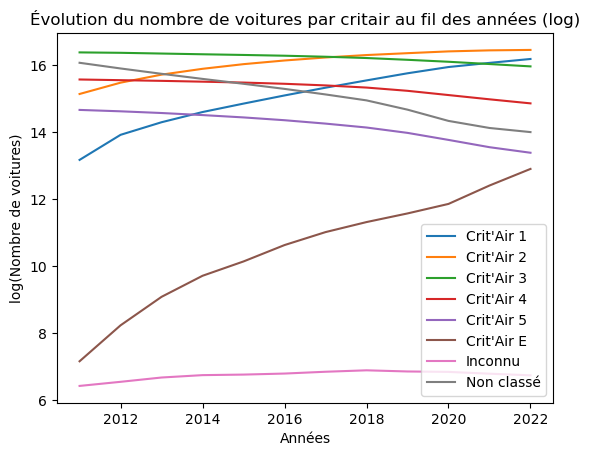

In [37]:
# Appliquez le logarithme à toutes les variables sélectionnées
result=result_crit.copy()
result[variables] = np.log(result[variables])

v=result.iloc[0]
v=v[1:]
Années=[2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]
i=0
for c in result['CRITAIR']:
    v=result.iloc[i]
    v=v[1:]
    plt.plot(Années,v, label=c)
    i+=1

# Ajout des titres et légendes
plt.title('Évolution du nombre de voitures par critair au fil des années (log)')
plt.xlabel('Années')
plt.ylabel('log(Nombre de voitures)')
plt.legend()
plt.show()

Nous voyons très clairement que les véhicules électriques semblent avoir la croissance la plus importante, suivi par les Crit'Air 1, ce qui semble cohérent avec les prérogatives gouvernementales.

## Estimation des taux de croissance

In [38]:
result_crit=result_crit.set_index('CRITAIR')

# Calculer les taux de croissance pour chaque colonne
taux_de_croissance = result_crit.pct_change(axis=1)*100

# Calculer la moyenne des taux de croissance pour chaque ligne
taux_de_croissance_moyen = taux_de_croissance.mean(axis=1)

# Ajouter la colonne de taux de croissance moyen au DataFrame
result_crit['Taux_croissance_moyen'] = taux_de_croissance_moyen

In [39]:
taux_de_croissance #En pourcentage

,PARC_2011,PARC_2012,PARC_2013,PARC_2014,PARC_2015,PARC_2016,PARC_2017,PARC_2018,PARC_2019,PARC_2020,PARC_2021,PARC_2022
CRITAIR,,,,,,,,,,,,
Crit'Air 1,NaN,111.649433,45.758861,35.673212,28.681721,27.593845,26.081925,24.401933,23.702775,20.582484,13.190554,12.405571
Crit'Air 2,NaN,40.288377,27.141310,19.058176,14.916463,11.604832,9.431600,7.495132,5.771377,5.494516,3.129909,1.312311
Crit'Air 3,NaN,-1.205963,-2.189382,-2.144397,-2.028030,-2.246835,-3.023595,-3.762015,-5.167748,-5.704690,-6.582888,-6.774051
Crit'Air 4,NaN,-2.024627,-2.012836,-2.426897,-2.643176,-3.578342,-4.742453,-6.239682,-9.257893,-11.923119,-11.933231,-11.423692
Crit'Air 5,NaN,-4.080531,-4.971707,-5.997062,-6.745400,-8.035163,-9.632999,-11.025186,-14.831524,-18.965153,-19.574501,-15.309724
Crit'Air E,NaN,193.119625,134.489197,87.680582,53.518395,63.196336,47.353397,34.997537,29.446532,32.936866,73.345913,64.305429
Inconnu,NaN,13.071895,13.728324,7.369759,1.656805,3.143190,5.530474,4.385027,-3.381148,-1.272534,-5.263158,-4.761905
Non classé,NaN,-15.621724,-14.759780,-14.117666,-13.635097,-14.126121,-15.304925,-16.277179,-24.233436,-28.567145,-19.062416,-11.585783


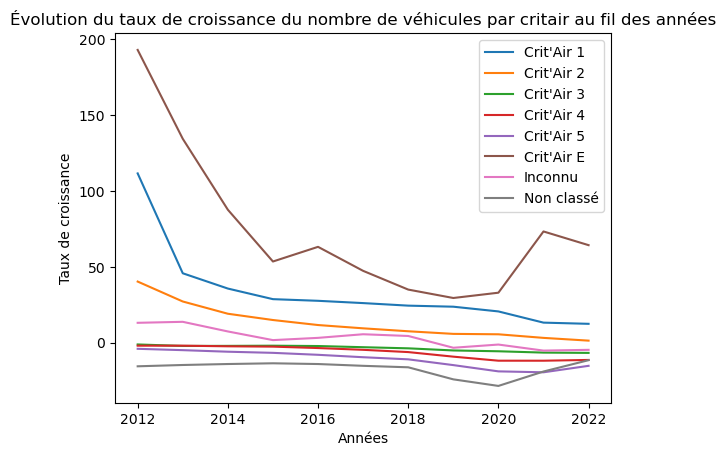

In [40]:
Années=[2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022] # on retire 2011
i=0
for c in taux_de_croissance.index:
    v=taux_de_croissance.iloc[i]
    v=v[1:]
    plt.plot(Années,v, label=c)
    i+=1
    
# Ajout des titres et légendes
plt.title('Évolution du taux de croissance du nombre de véhicules par critair au fil des années')
plt.xlabel('Années')
plt.ylabel('Taux de croissance')
plt.legend()
plt.show()

Le taux de croissance des crit'air les plus polluants est nul voir négatif pour certains comme les 5 et non classé.
Nous pouvons constater que les taux de croissance semblent tous décroitre au fil du temps à part pour les véhicules électriques qui connaissent un nouvel élan à depuis 2020.

## Évolution du nombre de véhicules par carburants

De la même manière que précédemment nous allons maintenant étudier l'évolution des véhicules particuliers mais cette fois en fonction de leur carburant.

In [22]:
carburants=data.groupby('CARBURANT')[variables].sum()
carburants=carburants.mean(axis=1)

#Caluler la proportion de chaque carburant
proportion_carburants = carburants / carburants.sum()
proportion_carburants

CARBURANT
Diesel                     0.610071
Diesel HNR                 0.001252
Electrique et hydrogène    0.002557
Essence                    0.372183
Essence HNR                0.006400
Gaz et inconnu             0.005571
Hybride rechargeable       0.001967
dtype: float64

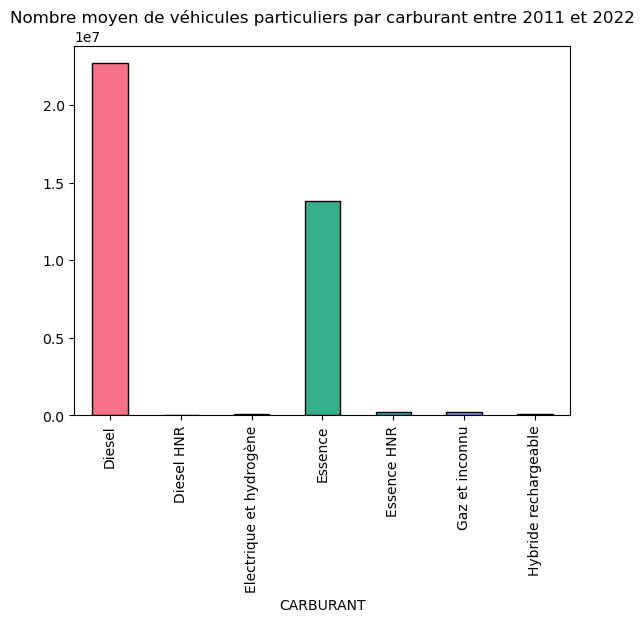

In [23]:
couleurs_palette = sns.color_palette("husl", n_colors=len(carburants))
carburants.plot(kind='bar', edgecolor='black', color=couleurs_palette)
plt.title("Nombre moyen de véhicules particuliers par carburant entre 2011 et 2022")
plt.show()

Comme nous pouvons le voir sur le graphique, les véhicules diesels et essences sont prédominants sur le parc automobile. Nous comptons en moyen 61% de véhicules diesel et 37% de véhicules essence.

# Étude des entrées de nouveaux véhicules sur le marché

Nous allons créer un tableau avec le nombre de véhicules neufs (donc de 0 an) pour chaque année en fonction du Crit'Air et du carburant.

In [49]:
data_neuf=data[data.AGE=="0 an"].copy() #Récupération des données ne concernant que les véhicules neufs

### En fonction du Crit'air

In [50]:
data_neuf.groupby(['CRITAIR'])[variables].sum()

,PARC_2011,PARC_2012,PARC_2013,PARC_2014,PARC_2015,PARC_2016,PARC_2017,PARC_2018,PARC_2019,PARC_2020,PARC_2021,PARC_2022
CRITAIR,,,,,,,,,,,,
Crit'Air 1,349151,594481,505003,578175,640274,798239,955861,1108785,1331838,1441943,1052970,1164649
Crit'Air 2,923393,1534540,1396119,1229646,1178450,1130742,1063924,994554,849169,771072,550521,402902
Crit'Air 3,984103,67794,1139,130,28,18,19,16,13,15,4,3
Crit'Air 4,84,45,17,11,8,5,7,3,0,3,0,1
Crit'Air 5,5,4,3,1,1,0,0,0,0,0,0,0
Crit'Air E,248,2579,5256,8174,10187,17335,21947,25194,31327,43133,111844,163854
Inconnu,87,76,105,85,30,47,62,74,8,1,1,0
Non classé,1321,1002,614,154,100,8,0,1,0,0,0,0


/opt/mamba/lib/python3.10/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


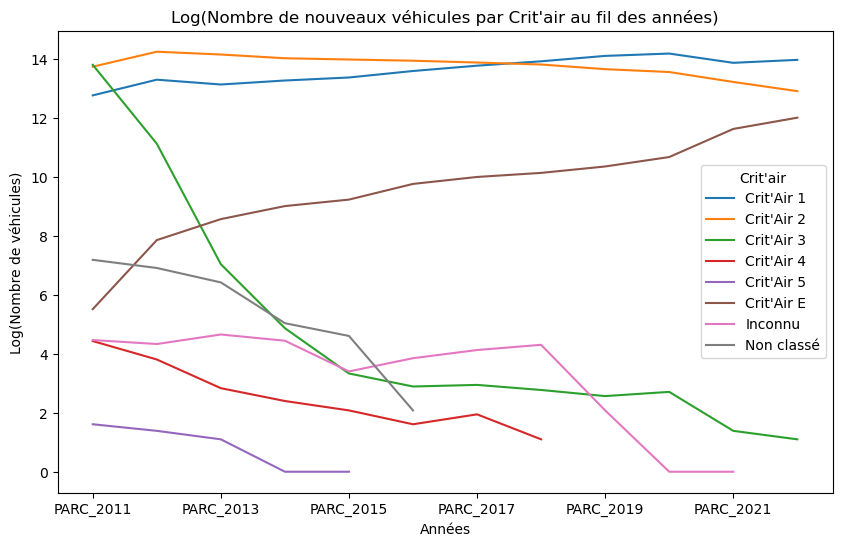

In [53]:
df_critair=data_neuf.groupby(['CRITAIR'])[variables].sum().reset_index()
df_critair.iloc[:,1:]=np.log(df_critair.iloc[:,1:]) #passage au log de nos données pour mettre en évidence petites valeurs

# Sélectionnez les colonnes avec les années
annees = df_critair.columns[1:]  # Supposant que les années commencent à la deuxième colonne

# Groupez les données par classe et trouvez la somme des véhicules pour chaque année
donnees_agroupees = df_critair.groupby('CRITAIR')[annees].sum()

# Transposez les données pour les avoir sous une forme plus adéquate pour le tracé
donnees_transposees = donnees_agroupees.T

# Tracer un graphique pour chaque classe de véhicules
donnees_transposees.plot(kind='line', figsize=(10, 6))
plt.title("Log(Nombre de nouveaux véhicules par Crit'air au fil des années)")
plt.xlabel('Années')
plt.ylabel('Log(Nombre de véhicules)')
plt.legend(title="Crit'air")
plt.show()

Comme dans ce que nous avons vu précédemment les tendances restent les même, avec les Crit'air 1, 2 et E qui ont des croissances beaucoup plus importantes.

### En fonction du carburant

In [28]:
data_neuf.groupby(['CARBURANT'])[variables].sum()

,PARC_2011,PARC_2012,PARC_2013,PARC_2014,PARC_2015,PARC_2016,PARC_2017,PARC_2018,PARC_2019,PARC_2020,PARC_2021,PARC_2022
CARBURANT,,,,,,,,,,,,
Diesel,1599354,1592652,1388397,1216709,1169419,1112160,1059582,993582,846464,759842,527533,366426
Diesel HNR,2,575,8854,13113,9121,18600,4328,984,2703,11244,22990,36476
Electrique et hydrogène,239,2680,5504,8216,10207,17336,21947,25194,31326,43133,111844,163854
Essence,575767,582228,485391,541741,603620,755105,901396,1027219,1225230,1324492,810815,709176
Essence HNR,1230,1384,14265,32757,32314,35744,46431,68638,89835,96714,151031,268450
Gaz et inconnu,75337,12203,2298,3019,2415,1709,588,1187,2328,2356,16839,46466
Hybride rechargeable,6463,8799,3547,821,1982,5740,7548,11823,14469,18386,74288,140561


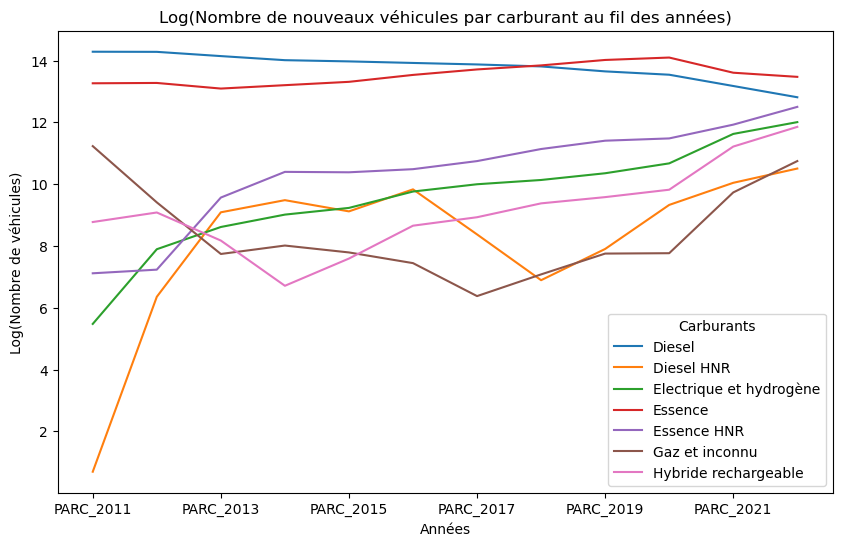

In [55]:
df_carburant=data_neuf.groupby(['CARBURANT'])[variables].sum().reset_index()
df_carburant.iloc[:,1:]=np.log(df_carburant.iloc[:,1:]) #passage au log de nos données

annees = df_carburant.columns[1:]  # Supposant que les années commencent à la deuxième colonne

# Groupez les données par classe et trouvez la somme des véhicules pour chaque année
donnees_agroupees = df_carburant.groupby('CARBURANT')[annees].sum()

# Transposez les données pour les avoir sous une forme plus adéquate pour le tracé
donnees_transposees = donnees_agroupees.T

# Tracer un graphique pour chaque classe de carburants
donnees_transposees.plot(kind='line', figsize=(10, 6))
plt.title("Log(Nombre de nouveaux véhicules par carburant au fil des années)")
plt.xlabel('Années')
plt.ylabel('Log(Nombre de véhicules)')
plt.legend(title="Carburants")
plt.show()

Les véhicules diesels et essences restent prédominants sur le parc automobile au fil des années. Cependant, nous pouvons voir que les carburants dit moins "polluants" croissent plus fortement. 

## Poursuite de l'étude

Après cette première étude rapide des données, nous allons nous interresser à l'évolution du parc automobile dans le but de pouvoir prédire les émissions polluantes jusqu'en 2050. 